#### Мажник Павел, 792

### ДЗ 4. Доверительные интервалы.
#### Задача 1. 
Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$
в теоретических задачах 6.1, 6.3, 6.4 и 6.5. В задачах 6.1, 6.3 и
6.4 возьмите $\theta = 10,$ в задаче 6.5 возьмите $(\theta, \lambda)
= (10, 3).$ Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
постройте доверительные интервалы, полученные в теоретических
задачах. Изобразите их на графиках в координатах $(n, \theta),$
используя
matplotlib.pyplot.fill\_between.  
Для $n = 100$ оцените вероятность попадания истинного значения
$\theta$ в интервал (в каждой задаче). Для этого сгенерируйте
достаточно много выборок (предложите, сколько нужно выборок),
постройте по каждой из них интервалы и определите, сколько раз в
интервалы попадает истинное значение $\theta.$ Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

In [97]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

N = 100
alpha = 0.95

In [98]:
# Функция для построения графиков.
def makePlot(sample, left, right, ylim=None, start=1):
    x = range(start, N + 1)
    plt.figure(figsize=(10, 5))
    plt.fill_between(x,  [left(sample[:n]) for n in x], [right(sample[:n]) for n in x],
                     label=r'Доверительный интервал для $\theta$')
    plt.plot(x, [left(sample[:n]) for n in x], c='black')     
    plt.plot(x, [right(sample[:n]) for n in x], c='black')
    plt.plot(x, [theta] * len(x), c='red', label=r'Истинное значение $\theta$')
    if ylim:
        plt.ylim(ylim)
    plt.xlabel(r'$n$')
    plt.ylabel(r"$\theta$")
    plt.legend()
    plt.show()

Напишем функцию для оценки вероятности попадания истинного значения $\theta$ в интервал для заданного распределения.  
Возьмем 10000 выборок и найдем процент выборок, для которых истинное значение попало в интервал.

In [99]:
def est_probability(distr, left, right):
    M = 10000
    count = 0
    samples = distr.rvs(size=(M, N))
    for sample in samples:
        if left(sample) <= theta <= right(sample):
            count += 1
    print(f'Оценка вероятности попадания истинного значения theta в интервал: {count / M}')
    return count / M

### Равномерное распределение $U[0, \theta],\, \theta = 10$

In [100]:
# сгенерируем выборку: 
theta = 10
uniform_distr = sts.uniform(loc=0, scale=theta)
uniform_sample = uniform_distr.rvs(N)

__а)__ Cтатистика $\overline{X}$

Доверительный интервал:
$$\left(\frac{\overline{X}}{\frac{1}{2} + \frac{1}{\sqrt{12 n (1 - \alpha)}}}, 
\frac{\overline{X}}{\frac{1}{2} - \frac{1}{\sqrt{12 n (1 - \alpha)}}}\right).$$
При $\frac{1}{2} \leqslant \frac{1}{\sqrt{12 n (1 - \alpha)}}$ правый конец берем $+\infty$.

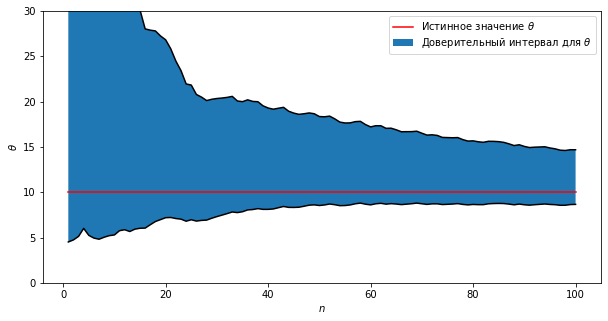

Оценка вероятности попадания истинного значения theta в интервал: 1.0


1.0

In [101]:
# строим график и оцениваем вероятность попадания: 
left = lambda x: np.mean(x) / (1 / 2 + 1 / np.sqrt(12 * len(x) * (1 - alpha)))
right = lambda x: (np.mean(x) / (1 / 2 - 1 / np.sqrt(12 * len(x) * (1 - alpha)))
                   if 1 / 2 > 1 / np.sqrt(12 * len(x) * (1 - alpha)) else 10**9)
makePlot(uniform_sample, left, right, (0, 30))
est_probability(uniform_distr, left, right)

__б)__ Cтатистика $X_{(1)}$

Доверительный интервал:
$$\left(X_{(1)},\,\frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}\right).$$

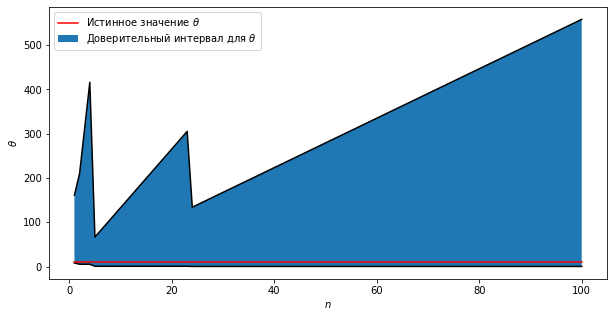

Оценка вероятности попадания истинного значения theta в интервал: 0.9492


0.9492

In [102]:
left = lambda x: np.min(x)
right = lambda x: np.min(x) / (1 - alpha ** (1 / len(x)))
makePlot(uniform_sample, left, right)
est_probability(uniform_distr, left, right)

__в)__ Cтатистика $X_{(n)}$

$$\left(X_{(n)},\,\frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}\right).$$

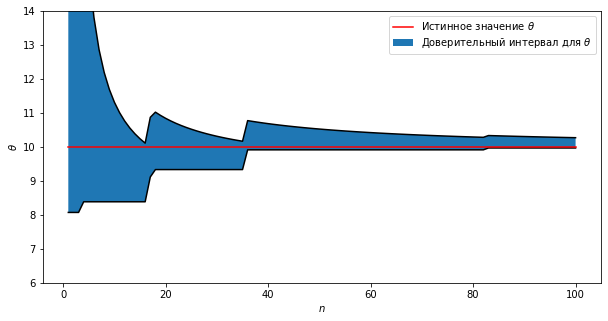

Оценка вероятности попадания истинного значения theta в интервал: 0.9483


0.9483

In [103]:
left = lambda x: np.max(x)
right = lambda x: np.max(x) / (1 - alpha) ** (1 / len(x))
makePlot(uniform_sample, left, right, (6, 14))
est_probability(uniform_distr, left, right)

### Распределение Коши $(\theta, 1),\, \theta = 10$

In [104]:
theta = 10
cauchy_distr = sts.cauchy(loc=theta)
cauchy_sample = cauchy_distr.rvs(N)

Асимптотический доверительный интервал:  
$$\left(\hat{\mu} - \frac{\pi  u_{\frac{1 + \alpha}{2}}}{2 \sqrt{n}}, 
\hat{\mu} + \frac{\pi  u_{\frac{1 + \alpha}{2}}}{2 \sqrt{n}}\right),$$
где $\hat{\mu}$ - выборочная медиана, $u_{p}$ - $p$ квантиль стандартного нормального распределения.

In [105]:
# получаем квантиль:
u = sts.norm.ppf((1 + alpha) / 2)
print(u)

1.959963984540054


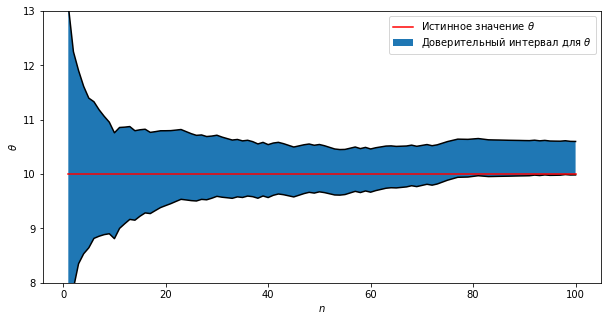

Оценка вероятности попадания истинного значения theta в интервал: 0.9469


0.9469

In [106]:
left = lambda x: np.median(x) - (np.pi * u / (2 * np.sqrt(len(x))))
right = lambda x: np.median(x) + (np.pi * u / (2 * np.sqrt(len(x))))
makePlot(cauchy_sample, left, right, (8, 13))
est_probability(cauchy_distr, left, right)

### Распределение Пуассона $(\theta),\, \theta = 10$

In [107]:
theta = 10
pois_distr = sts.poisson(mu=theta)
pois_sample = pois_distr.rvs(N)

Асимптотический доверительный интервал:  
$$\left(\overline{X} - \sqrt{\frac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\overline{X} + \sqrt{\frac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right).$$

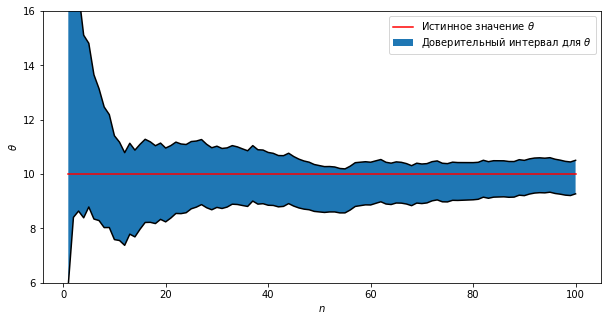

Оценка вероятности попадания истинного значения theta в интервал: 0.951


0.951

In [108]:
left = lambda x: np.mean(x) - u * np.sqrt(np.mean(x) / len(x))
right = lambda x: np.mean(x) + u * np.sqrt(np.mean(x) / len(x))
makePlot(pois_sample, left, right, (6, 16))
est_probability(pois_distr, left, right)

### Гамма распределение $(\theta, \lambda),\, \theta = 10, \lambda = 3$

In [115]:
theta = 10
lambd = 3
gamma_distr = sts.gamma(a=theta, scale=1/lambd)
gamma_sample = gamma_distr.rvs(N)

__а)__ Случай, когда $\lambda$ известно

Асимптотический доверительный интервал при известном $\lambda$ равен:
$$\left(\lambda \overline{X} - \sqrt{\frac{\lambda \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\lambda \overline{X} + \sqrt{\frac{\lambda \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right),$$

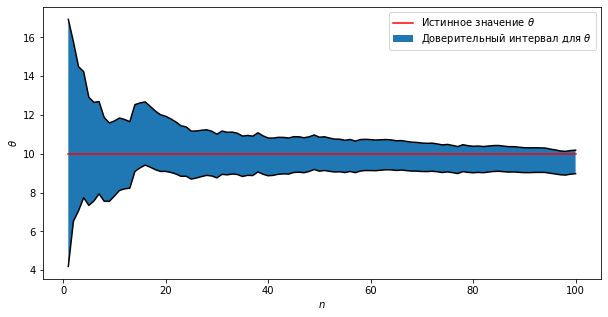

Оценка вероятности попадания истинного значения theta в интервал: 0.9503


0.9503

In [116]:
left = lambda x: lambd * np.mean(x) - u * np.sqrt(np.mean(x) * lambd / len(x))
right = lambda x: lambd * np.mean(x) + u * np.sqrt(np.mean(x) * lambd / len(x))
makePlot(gamma_sample, left, right)
est_probability(gamma_distr, left, right)

__б)__ Случай, когда $\lambda$ неизвестно

Т.к. доверительный интервал асимптотический, мы можем заменить $\lambda$ на ее состоятельную оценку.  
Посчитаем состоятельную оценку методом моментов: $\hat{\lambda} = \frac{\overline X}{\overline{X^2} - \left(\overline X\right)^2}$.  
$$\left(\hat{\lambda} \overline{X} - \sqrt{\frac{\hat{\lambda} \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\hat{\lambda} \overline{X} + \sqrt{\frac{\hat{\lambda} \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right).$$

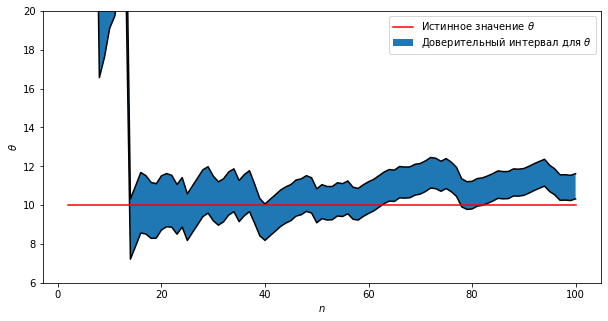

Оценка вероятности попадания истинного значения theta в интервал: 0.3185


0.3185

In [120]:
lambd_est = lambda x: np.mean(x) / (np.mean(x**2) - 
                 np.mean(x)**2)
left = lambda x: lambd_est(x) * np.mean(x) - u * np.sqrt(np.mean(x) * lambd_est(x) / len(x))
right = lambda x: lambd_est(x) * np.mean(x) + u * np.sqrt(np.mean(x) * lambd_est(x) / len(x))
# для n = 1 оценка lambda отсутствует, поэтому начинаем график с n = 2:
makePlot(gamma_sample, left, right, (6, 20), start=2)
est_probability(gamma_distr, left, right)

__Вывод__:  
Изграфиков мы видим, что при любом распределении истинное значение $\theta$ почти всегда попадает в доверительный интервал уровня доверия 0.95 (даже в асимптотическом случае). Единственный асимптотический доверительный интервал, для которого получается низкая оценка вероятности попадания в интервал, это ДИ для параметра $\theta$ при неизвестном $\lambda$. Это объясняется тем, что данный интервал явяляется асимптотическим, и тем, что мы берем оценку $\lambda$, а не ее точное значение.